### Importing libraries 

In [100]:
# handling data 
import random
import pandas as pd 
import numpy as np 

# warnings
pd.options.mode.chained_assignment = None 
import warnings
warnings.filterwarnings("ignore")

# plotting  
import seaborn as sns 
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.figure_factory as ff

# machine learning
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer 
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.preprocessing import Normalizer, StandardScaler
from sklearn.metrics import silhouette_score
from sklearn import metrics

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

In [2]:
df = pd.read_csv('expected_ctc.csv')
df.head()

IDX  Applicant_ID  Total_Experience  Total_Experience_in_field_applied  \
0    1         22753                 0                                  0   
1    2         51087                23                                 14   
2    3         38413                21                                 12   
3    4         11501                15                                  8   
4    5         58941                10                                  5   

       Department               Role   Industry Organization      Designation  \
0             NaN                NaN        NaN          NaN              NaN   
1              HR         Consultant  Analytics            H               HR   
2  Top Management         Consultant   Training            J              NaN   
3         Banking  Financial Analyst   Aviation            F               HR   
4           Sales    Project Manager  Insurance            E  Medical Officer   

   Education  ... Curent_Location Preferred_location  Current_CTC  \
0         PG  ...        Guwahati               Pune            0   
1  Doctorate  ...       Bangalore             Nagpur      2702664   
2  Doctorate  ...       Ahmedabad             Jaipur      2236661   
3  Doctorate  ...          Kanpur            Kolkata      2100510   
4       Grad  ...       Ahmedabad          Ahmedabad      1931644   

  Inhand_Offer Last_Appraisal_Rating  No_Of_Companies_worked  \
0            N                   NaN                       0   
1            Y         Key_Performer                       2   
2            Y         Key_Performer                       5   
3            N                     C                       5   
4            N                     C                       2   

  Number_of_Publications Certifications  International_degree_any Expected_CTC  
0                      0              0                         0       384551  
1                      4              0                         0      3783729  
2                      3              0                         0      3131325  
3                      3              0                         0      2608833  
4                      3              0                         0      2221390  

[5 rows x 29 columns]

In [3]:
df.shape
old_shape = df.shape[0]

In [4]:
df.columns

Index(['IDX', 'Applicant_ID', 'Total_Experience',
       'Total_Experience_in_field_applied', 'Department', 'Role', 'Industry',
       'Organization', 'Designation', 'Education', 'Graduation_Specialization',
       'University_Grad', 'Passing_Year_Of_Graduation', 'PG_Specialization',
       'University_PG', 'Passing_Year_Of_PG', 'PHD_Specialization',
       'University_PHD', 'Passing_Year_Of_PHD', 'Curent_Location',
       'Preferred_location', 'Current_CTC', 'Inhand_Offer',
       'Last_Appraisal_Rating', 'No_Of_Companies_worked',
       'Number_of_Publications', 'Certifications', 'International_degree_any',
       'Expected_CTC'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 29 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   IDX                                25000 non-null  int64  
 1   Applicant_ID                       25000 non-null  int64  
 2   Total_Experience                   25000 non-null  int64  
 3   Total_Experience_in_field_applied  25000 non-null  int64  
 4   Department                         22222 non-null  object 
 5   Role                               24037 non-null  object 
 6   Industry                           24092 non-null  object 
 7   Organization                       24092 non-null  object 
 8   Designation                        21871 non-null  object 
 9   Education                          25000 non-null  object 
 10  Graduation_Specialization          18820 non-null  object 
 11  University_Grad                    18820 non-null  obj

### Descriptive stats of the numeric features 

gives values about number of data points at each feature <br>
min, max, sd, 25th and 75th percentile and the mean(50th percentile)

In [6]:
df.describe()

IDX  Applicant_ID  Total_Experience  \
count  25000.000000  25000.000000      25000.000000   
mean   12500.500000  34993.240080         12.493080   
std     7217.022701  14390.271591          7.471398   
min        1.000000  10000.000000          0.000000   
25%     6250.750000  22563.750000          6.000000   
50%    12500.500000  34974.500000         12.000000   
75%    18750.250000  47419.000000         19.000000   
max    25000.000000  60000.000000         25.000000   

       Total_Experience_in_field_applied  Passing_Year_Of_Graduation  \
count                       25000.000000                18820.000000   
mean                            6.258200                 2002.193624   
std                             5.819513                    8.316640   
min                             0.000000                 1986.000000   
25%                             1.000000                 1996.000000   
50%                             5.000000                 2002.000000   
75%                            10.000000                 2009.000000   
max                            25.000000                 2020.000000   

       Passing_Year_Of_PG  Passing_Year_Of_PHD   Current_CTC  \
count        17308.000000         13119.000000  2.500000e+04   
mean          2005.153571          2007.396372  1.760945e+06   
std              9.022963             7.493601  9.202125e+05   
min           1988.000000          1995.000000  0.000000e+00   
25%           1997.000000          2001.000000  1.027312e+06   
50%           2006.000000          2007.000000  1.802568e+06   
75%           2012.000000          2014.000000  2.443883e+06   
max           2023.000000          2020.000000  3.999693e+06   

       No_Of_Companies_worked  Number_of_Publications  Certifications  \
count            25000.000000            25000.000000    25000.000000   
mean                 3.482040                4.089040        0.773680   
std                  1.690335                2.606612        1.199449   
min                  0.000000                0.000000        0.000000   
25%                  2.000000                2.000000        0.000000   
50%                  3.000000                4.000000        0.000000   
75%                  5.000000                6.000000        1.000000   
max                  6.000000                8.000000        5.000000   

       International_degree_any  Expected_CTC  
count              25000.000000  2.500000e+04  
mean                   0.081720  2.250155e+06  
std                    0.273943  1.160480e+06  
min                    0.000000  2.037440e+05  
25%                    0.000000  1.306278e+06  
50%                    0.000000  2.252136e+06  
75%                    0.000000  3.051354e+06  
max                    1.000000  5.599570e+06

In [7]:
df.isnull().sum()

IDX                                      0
Applicant_ID                             0
Total_Experience                         0
Total_Experience_in_field_applied        0
Department                            2778
Role                                   963
Industry                               908
Organization                           908
Designation                           3129
Education                                0
Graduation_Specialization             6180
University_Grad                       6180
Passing_Year_Of_Graduation            6180
PG_Specialization                     7692
University_PG                         7692
Passing_Year_Of_PG                    7692
PHD_Specialization                   11881
University_PHD                       11881
Passing_Year_Of_PHD                  11881
Curent_Location                          0
Preferred_location                       0
Current_CTC                              0
Inhand_Offer                             0
Last_Apprai

### Missing value imputation :

* creating data frame for available features and the percentage of missing value in each 

* helps to find out if there is any column where most of the rows are empty (>90%). These are noise which we can drop 


In [8]:
def create_missing_value_df(dataframe) : 
    missing_values = []

    # calculate missing value percentage for each feature 
    for column in dataframe.columns : 
        missing_value_percentage = round((dataframe[column].isnull().sum() / len(dataframe)) * 100, 2)
        missing_values.append([column, missing_value_percentage])

    missing_value_df = pd.DataFrame(missing_values, columns=['feature', 'missing_value_percentage'])            # set column name 
    missing_value_df.sort_values(by = 'missing_value_percentage', ascending= False, inplace= True)              # sort dataframe 

    return missing_value_df

create_missing_value_df(df)

feature  missing_value_percentage
18                Passing_Year_Of_PHD                     47.52
17                     University_PHD                     47.52
16                 PHD_Specialization                     47.52
14                      University_PG                     30.77
15                 Passing_Year_Of_PG                     30.77
13                  PG_Specialization                     30.77
11                    University_Grad                     24.72
12         Passing_Year_Of_Graduation                     24.72
10          Graduation_Specialization                     24.72
8                         Designation                     12.52
4                          Department                     11.11
5                                Role                      3.85
7                        Organization                      3.63
6                            Industry                      3.63
23              Last_Appraisal_Rating                      3.63
25             Number_of_Publications                      0.00
21                        Current_CTC                      0.00
24             No_Of_Companies_worked                      0.00
26                     Certifications                      0.00
27           International_degree_any                      0.00
22                       Inhand_Offer                      0.00
0                                 IDX                      0.00
20                 Preferred_location                      0.00
19                    Curent_Location                      0.00
1                        Applicant_ID                      0.00
9                           Education                      0.00
3   Total_Experience_in_field_applied                      0.00
2                    Total_Experience                      0.00
28                       Expected_CTC                      0.00

as we can see all the features have <50% missing values, So we decide to keep all feature and come up with best imputation method to fill the missing values

* We start off the imputation with the features that have less missing values 

In [9]:
df.Last_Appraisal_Rating.unique()

array([nan, 'Key_Performer', 'C', 'B', 'A', 'D'], dtype=object)

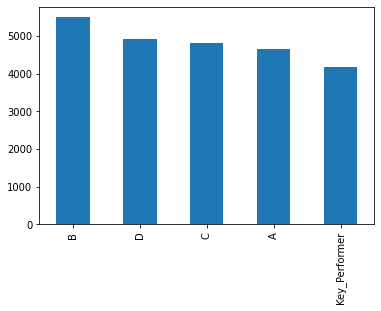

In [10]:
df.Last_Appraisal_Rating.value_counts().plot(kind = 'bar');

as we can see most of the people are getting **B** so we fill the missing values with **B**


In [11]:
df.Last_Appraisal_Rating.fillna(value='B', inplace= True)

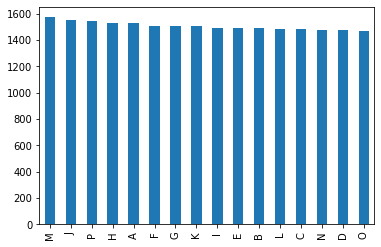

In [12]:
df.Organization.value_counts().plot(kind = 'bar');

as there no significant difference between counts of each organization, or in other words there is no significant mode in the data so we randomly fill the organizations

In [13]:
unique_organization = df.Organization.unique()

for i in range(len(df)) : 
    if df.Organization.isnull()[i] : 
        random_number = random.randint(0, len(unique_organization)-1)       # generate random number index 
        df.Organization[i] = unique_organization[random_number]             # make that index as organization 

In [14]:
df.Organization.fillna(value='M', inplace= True)

As we have filled the missing values in organization so we will use this feature to fill other features

In [15]:
def create_best_in_organization_dict(parameter) :

    dummy_df = df.groupby(['Organization', parameter])[['IDX']].count()             # IDX is used for counting as there is no missing value in IDX

    dummy_df.reset_index(inplace= True)                                                     
    dummy_df.rename(
        columns = {'IDX' : 'total'},                         
        inplace= True
    )

    dummy_dict = {}

    # creating dictionary where the key is the organization and value is the most occuring parameter in that organization 
    for organization in dummy_df.Organization.unique() :
        organization_max, dummy = 0, ''
        filter_df = dummy_df[dummy_df.Organization == organization]
        
        for i in range(len(filter_df)) : 
            if filter_df.total.iloc[i] > organization_max : 
                organization_max = filter_df.total.iloc[i] 
                dummy = filter_df[parameter].iloc[i]

        dummy_dict[organization] = dummy

    return dummy_dict 

In [16]:
df.Industry.value_counts()

Training      2237
IT            2228
Insurance     2219
BFSI          2207
Automobile    2202
Analytics     2201
Retail        2195
Telecom       2190
Aviation      2183
FMCG          2180
Others        2050
Name: Industry, dtype: int64

In [17]:
industry_dict = create_best_in_organization_dict('Industry')

for i in range(len(df)) : 
    if df.Industry.isnull()[i] : 
        df.Industry[i] = industry_dict[df.Organization[i]]

In [18]:
df.Role.value_counts()

Others                  2248
Bio statistician        1913
Analyst                 1892
Project Manager         1850
Team Lead               1833
Consultant              1780
Business Analyst        1711
Sales Execituve         1574
Sales Manager           1427
Senior Researcher       1236
Financial Analyst       1182
CEO                     1149
Scientist               1139
Head                    1108
Associate                767
Data scientist           363
Principal Analyst        275
Area Sales Manager       134
Senior Analyst           128
Researcher               123
Sr. Business Analyst     114
Professor                 33
Research Scientist        33
Lab Executuve             25
Name: Role, dtype: int64

In [19]:
role_dict = create_best_in_organization_dict('Role')

for i in range(len(df)) : 
    if df.Role.isnull()[i] : 
        df.Role[i] = role_dict[df.Organization[i]]

In [20]:
df.Department.value_counts()

Marketing         2379
Analytics/BI      2096
Healthcare        2062
Others            2041
Sales             1991
HR                1988
Banking           1952
Education         1948
Engineering       1937
Top Management    1632
Accounts          1118
IT-Software       1078
Name: Department, dtype: int64

In [21]:
department_dict = create_best_in_organization_dict('Department')

for i in range(len(df)) : 
    if df.Department.isnull()[i] : 
        df.Department[i] = department_dict[df.Organization[i]]

In [22]:
df.Designation.value_counts()

HR                    1648
Others                1647
Manager               1628
Product Manager       1626
Sr.Manager            1617
Consultant            1606
Marketing Manager     1590
Assistant Manager     1590
Data Analyst          1575
Research Analyst      1563
Medical Officer       1047
Software Developer     914
Web Designer           882
Network Engineer       862
Director               772
CA                     715
Research Scientist     537
Scientist               52
Name: Designation, dtype: int64

In [23]:
designation_dict = create_best_in_organization_dict('Designation')

for i in range(len(df)) : 
    if df.Designation.isnull()[i] : 
        df.Designation[i] = designation_dict[df.Organization[i]]

In [24]:
df.Graduation_Specialization.value_counts()

Chemistry      1785
Economics      1774
Mathematics    1770
Zoology        1730
Arts           1721
Psychology     1705
Sociology      1697
Botony         1674
Engineering    1661
Others         1660
Statistics     1643
Name: Graduation_Specialization, dtype: int64

In [25]:
for i in range(len(df)) : 

    """
    if a person doesn't have a any of PG university, PG passing out year and PG specialization 
    we set the value to -1 --> the person doesn't have a PG degree 
    same logic is applied to UG and PHD
    """

    if df.University_PG.isnull()[i] and df.Passing_Year_Of_PG.isnull()[i] and df.PG_Specialization.isnull()[i] : 
        df.University_PG[i] = -1
        df.Passing_Year_Of_PG[i] = -1
        df.PG_Specialization[i] = -1

    if df.University_PHD.isnull()[i] and df.Passing_Year_Of_PHD.isnull()[i] and df.PHD_Specialization.isnull()[i] : 
        df.University_PHD[i] = -1
        df.Passing_Year_Of_PHD[i] = -1
        df.PHD_Specialization[i] = -1

    if df.University_Grad.isnull()[i] and df.Passing_Year_Of_Graduation.isnull()[i] and df.Graduation_Specialization.isnull()[i] : 
        df.University_Grad[i] = -1
        df.Passing_Year_Of_Graduation[i] = -1
        df.Graduation_Specialization[i] = -1


In [26]:
create_missing_value_df(df)

feature  missing_value_percentage
0                                 IDX                       0.0
15                 Passing_Year_Of_PG                       0.0
27           International_degree_any                       0.0
26                     Certifications                       0.0
25             Number_of_Publications                       0.0
24             No_Of_Companies_worked                       0.0
23              Last_Appraisal_Rating                       0.0
22                       Inhand_Offer                       0.0
21                        Current_CTC                       0.0
20                 Preferred_location                       0.0
19                    Curent_Location                       0.0
18                Passing_Year_Of_PHD                       0.0
17                     University_PHD                       0.0
16                 PHD_Specialization                       0.0
14                      University_PG                       0.0
1                        Applicant_ID                       0.0
13                  PG_Specialization                       0.0
12         Passing_Year_Of_Graduation                       0.0
11                    University_Grad                       0.0
10          Graduation_Specialization                       0.0
9                           Education                       0.0
8                         Designation                       0.0
7                        Organization                       0.0
6                            Industry                       0.0
5                                Role                       0.0
4                          Department                       0.0
3   Total_Experience_in_field_applied                       0.0
2                    Total_Experience                       0.0
28                       Expected_CTC                       0.0

In [27]:
# converting datatype from float to int 
df['Passing_Year_Of_Graduation'] = df['Passing_Year_Of_Graduation'].astype(int)
df['Passing_Year_Of_PG'] = df['Passing_Year_Of_PG'].astype(int)
df['Passing_Year_Of_PHD'] = df['Passing_Year_Of_PHD'].astype(int)

Now the issue is still the same. In the Education column its mentioned that the candidate is ugraduated but his graduation year is missing. <br>

In [28]:
df[(df.Education == 'Under Grad') & (df.Passing_Year_Of_Graduation == -1)]

IDX  Applicant_ID  Total_Experience  \
12        13         11739                10   
18        19         43538                14   
22        23         33614                22   
28        29         32522                19   
30        31         23886                 4   
...      ...           ...               ...   
24990  24991         34589                22   
24991  24992         13280                 1   
24994  24995         32035                 7   
24996  24997         53442                12   
24997  24998         15777                22   

       Total_Experience_in_field_applied      Department  \
12                                    10          Others   
18                                     9           Sales   
22                                     6  Top Management   
28                                     7      Healthcare   
30                                     4       Marketing   
...                                  ...             ...   
24990                                  1  Top Management   
24991                                  1           Sales   
24994                                  3  Top Management   
24996                                  8              HR   
24997                                  8         Banking   

                       Role    Industry Organization         Designation  \
12         Bio statistician  Automobile            H          Consultant   
18         Business Analyst     Telecom            M     Product Manager   
22               Consultant        BFSI            D          Sr.Manager   
28          Project Manager     Telecom            D              Others   
30         Bio statistician      Others            O     Medical Officer   
...                     ...         ...          ...                 ...   
24990  Sr. Business Analyst   Analytics            D             Manager   
24991            Consultant          IT            A   Marketing Manager   
24994                Others     Telecom            A        Data Analyst   
24996                Others   Analytics            B          Sr.Manager   
24997                  Head   Insurance            D  Software Developer   

        Education  ... Curent_Location Preferred_location  Current_CTC  \
12     Under Grad  ...           Surat             Kanpur      1446451   
18     Under Grad  ...     Bhubaneswar            Chennai      1290371   
22     Under Grad  ...           Delhi               Pune      2148699   
28     Under Grad  ...          Kanpur              Delhi      2617413   
30     Under Grad  ...       Bangalore              Surat       565089   
...           ...  ...             ...                ...          ...   
24990  Under Grad  ...           Delhi            Kolkata      2211197   
24991  Under Grad  ...           Delhi              Surat       485277   
24994  Under Grad  ...          Kanpur              Surat      1001529   
24996  Under Grad  ...       Bangalore             Nagpur      1350793   
24997  Under Grad  ...            Pune              Delhi      1681796   

      Inhand_Offer Last_Appraisal_Rating  No_Of_Companies_worked  \
12               N                     C                       3   
18               N                     D                       5   
22               Y                     A                       2   
28               Y         Key_Performer                       3   
30               N                     B                       3   
...            ...                   ...                     ...   
24990            N                     C                       5   
24991            N                     B                       1   
24994            N                     B                       6   
24996            Y                     B                       6   
24997            N                     C                       4   

      Number_of_Publications Certifications  International_degree_any  \
12                 


So here we will use machine learning to predict their graduation year 

In [29]:
# creating training data 
dummy_df = df.copy()
dummy_df = dummy_df[['Total_Experience', 'Passing_Year_Of_Graduation', 'Passing_Year_Of_PHD', 'Passing_Year_Of_PG', 'Certifications', 'Current_CTC']]
training_data = dummy_df[(dummy_df.Passing_Year_Of_Graduation != -1) & (df.Passing_Year_Of_PHD != -1) & (df.Passing_Year_Of_PG != -1)]


# Department and independent feature split 
X_UG = training_data[['Total_Experience', 'Certifications', 'Current_CTC']]
y_UG = training_data['Passing_Year_Of_Graduation']

X_PG = training_data[['Total_Experience', 'Certifications', 'Current_CTC', 'Passing_Year_Of_Graduation']]
y_PG = training_data['Passing_Year_Of_PG']

X_PHD = training_data[['Total_Experience', 'Certifications', 'Current_CTC', 'Passing_Year_Of_Graduation', 'Passing_Year_Of_PG']]
y_PHD = training_data['Passing_Year_Of_PHD']


# train test split 
x_train_UG, x_test_UG, y_train_UG, y_test_UG = train_test_split(X_UG, y_UG, test_size=0.2, random_state=42)

x_train_PG, x_test_PG, y_train_PG, y_test_PG = train_test_split(X_PG, y_PG, test_size=0.2, random_state=42)

x_train_PHD, x_test_PHD, y_train_PHD, y_test_PHD = train_test_split(X_PHD, y_PHD, test_size=0.2, random_state=42)

# fitting model 
UG_graduation_model = LinearRegression()
UG_graduation_model.fit(x_train_UG, y_train_UG)

PG_graduation_model = LinearRegression()
PG_graduation_model.fit(x_train_PG, y_train_PG)

PHD_graduation_model = LinearRegression()
PHD_graduation_model.fit(x_train_PHD, y_train_PHD)

LinearRegression()

We can see that regression models can predict the years pretty accurately.

In [30]:
# evaluation
y_prediction_UG =  UG_graduation_model.predict(x_test_UG)
score=r2_score(y_test_UG,y_prediction_UG)
print('r2 socre for UG is ',score)
print('mean_sqrd_error for UG is ==',mean_squared_error(y_test_UG,y_prediction_UG))
print('root_mean_squared error for UG is ==',np.sqrt(mean_squared_error(y_test_UG,y_prediction_UG)))
print("="*50)

y_prediction_PG =  PG_graduation_model.predict(x_test_PG)
score=r2_score(y_test_PG,y_prediction_PG)
print('r2 socre for PG is ',score)
print('mean_sqrd_error for PG is ==',mean_squared_error(y_test_PG,y_prediction_PG))
print('root_mean_squared error for PG is ==',np.sqrt(mean_squared_error(y_test_PG,y_prediction_PG)))
print("="*50)

y_prediction_PHD =  PHD_graduation_model.predict(x_test_PHD)
score=r2_score(y_test_PHD,y_prediction_PHD)
print('r2 socre for PHD is ',score)
print('mean_sqrd_error for PHD is ==',mean_squared_error(y_test_PHD,y_prediction_PHD))
print('root_mean_squared error for PHD is ==',np.sqrt(mean_squared_error(y_test_PHD,y_prediction_PHD)))

r2 socre for UG is  0.9774607917888315
mean_sqrd_error for UG is == 1.2449958506726286
root_mean_squared error for UG is == 1.1157938208614657
r2 socre for PG is  1.0
mean_sqrd_error for PG is == 5.729466985703317e-21
root_mean_squared error for PG is == 7.569324266870404e-11
r2 socre for PHD is  1.0
mean_sqrd_error for PHD is == 1.1822011054522912e-20
root_mean_squared error for PHD is == 1.087290718001534e-10


In [31]:
# testing model on dummy data 
int(UG_graduation_model.predict([[10, 0, 82838123]])[0])

2004

In [32]:
for i in range(len(df)) : 

    if (df.Passing_Year_Of_Graduation[i] == -1) : 
        df.Passing_Year_Of_Graduation[i] = int(UG_graduation_model.predict(
            [[df.Total_Experience[i], df.Certifications[i], df.Current_CTC[i]]])[0])
        
    if (df.Passing_Year_Of_PG[i] == -1) and ((df.Education[i] == 'PG') or (df.Education[i] == 'Doctorate')) : 
        df.Passing_Year_Of_PG[i] = int(PG_graduation_model.predict(
            [[df.Total_Experience[i], df.Certifications[i], df.Current_CTC[i], df.Passing_Year_Of_Graduation[i]]])[0])
        
    if (df.Passing_Year_Of_PHD[i] == -1) and (df.Education[i] == 'Doctorate') : 
        df.Passing_Year_Of_PHD[i] = int(PHD_graduation_model.predict(
            [[df.Total_Experience[i], df.Certifications[i], df.Current_CTC[i], df.Passing_Year_Of_Graduation[i], df.Passing_Year_Of_PG[i]]])[0])

Now the issue is solved for passing out year. But it remained same for university and specialization. So here we will have to use classification algorithm to predict this 

In [33]:
df[(df.Education == 'Under Grad') & (df.University_PHD == -1)]

IDX  Applicant_ID  Total_Experience  \
12        13         11739                10   
18        19         43538                14   
22        23         33614                22   
28        29         32522                19   
30        31         23886                 4   
...      ...           ...               ...   
24990  24991         34589                22   
24991  24992         13280                 1   
24994  24995         32035                 7   
24996  24997         53442                12   
24997  24998         15777                22   

       Total_Experience_in_field_applied      Department  \
12                                    10          Others   
18                                     9           Sales   
22                                     6  Top Management   
28                                     7      Healthcare   
30                                     4       Marketing   
...                                  ...             ...   
24990                                  1  Top Management   
24991                                  1           Sales   
24994                                  3  Top Management   
24996                                  8              HR   
24997                                  8         Banking   

                       Role    Industry Organization         Designation  \
12         Bio statistician  Automobile            H          Consultant   
18         Business Analyst     Telecom            M     Product Manager   
22               Consultant        BFSI            D          Sr.Manager   
28          Project Manager     Telecom            D              Others   
30         Bio statistician      Others            O     Medical Officer   
...                     ...         ...          ...                 ...   
24990  Sr. Business Analyst   Analytics            D             Manager   
24991            Consultant          IT            A   Marketing Manager   
24994                Others     Telecom            A        Data Analyst   
24996                Others   Analytics            B          Sr.Manager   
24997                  Head   Insurance            D  Software Developer   

        Education  ... Curent_Location Preferred_location  Current_CTC  \
12     Under Grad  ...           Surat             Kanpur      1446451   
18     Under Grad  ...     Bhubaneswar            Chennai      1290371   
22     Under Grad  ...           Delhi               Pune      2148699   
28     Under Grad  ...          Kanpur              Delhi      2617413   
30     Under Grad  ...       Bangalore              Surat       565089   
...           ...  ...             ...                ...          ...   
24990  Under Grad  ...           Delhi            Kolkata      2211197   
24991  Under Grad  ...           Delhi              Surat       485277   
24994  Under Grad  ...          Kanpur              Surat      1001529   
24996  Under Grad  ...       Bangalore             Nagpur      1350793   
24997  Under Grad  ...            Pune              Delhi      1681796   

      Inhand_Offer Last_Appraisal_Rating  No_Of_Companies_worked  \
12               N                     C                       3   
18               N                     D                       5   
22               Y                     A                       2   
28               Y         Key_Performer                       3   
30               N                     B                       3   
...            ...                   ...                     ...   
24990            N                     C                       5   
24991            N                     B                       1   
24994            N                     B                       6   
24996            Y                     B                       6   
24997            N                     C                       4   

      Number_of_Publications Certifications  International_degree_any  \
12                 

In [34]:
df.columns

Index(['IDX', 'Applicant_ID', 'Total_Experience',
       'Total_Experience_in_field_applied', 'Department', 'Role', 'Industry',
       'Organization', 'Designation', 'Education', 'Graduation_Specialization',
       'University_Grad', 'Passing_Year_Of_Graduation', 'PG_Specialization',
       'University_PG', 'Passing_Year_Of_PG', 'PHD_Specialization',
       'University_PHD', 'Passing_Year_Of_PHD', 'Curent_Location',
       'Preferred_location', 'Current_CTC', 'Inhand_Offer',
       'Last_Appraisal_Rating', 'No_Of_Companies_worked',
       'Number_of_Publications', 'Certifications', 'International_degree_any',
       'Expected_CTC'],
      dtype='object')

In [35]:
# training_data
dummy_df = df.copy()
dummy_df = dummy_df[[
        'Department', 'Role', 'Industry','Graduation_Specialization', 
        'PG_Specialization', 'PHD_Specialization', 'Current_CTC'
    ]]

# encoding categorical variables
label_encoder = LabelEncoder()
training_data = dummy_df[(dummy_df.Graduation_Specialization != -1) & (df.PG_Specialization != -1) & (df.PHD_Specialization != -1)]

# encoding categorical variables 
training_data['Department'] = label_encoder.fit_transform(training_data['Department'])
Department_mapping = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))                                    # saving the mapping for later use 

training_data['Role'] = label_encoder.fit_transform(training_data['Role'])
Role_mapping = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))                                          # saving the mapping for later use

training_data['Industry'] = label_encoder.fit_transform(training_data['Industry'])
Industry_mapping = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))                                      # saving the mapping for later use

training_data['Graduation_Specialization'] = label_encoder.fit_transform(training_data['Graduation_Specialization'])
Graduation_Specialization_mapping = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))                     # saving the mapping for later use

training_data['PG_Specialization'] = label_encoder.fit_transform(training_data['PG_Specialization'])
PG_Specialization_mapping = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))                             # saving the mapping for later use

training_data['PHD_Specialization'] = label_encoder.fit_transform(training_data['PHD_Specialization'])
PHD_Specialization_mapping = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))                            # saving the mapping for later use


# dependent and independent feature split
X_UG_specialization = training_data[['Department', 'Role', 'Industry', 'Current_CTC']]
y_UG_specialization = training_data['Graduation_Specialization']

X_PG_specialization = training_data[['Department', 'Role', 'Industry', 'Current_CTC', 'Graduation_Specialization']]
y_PG_specialization = training_data['PG_Specialization']

X_PHD_specialization = training_data[['Department', 'Role', 'Industry', 'Current_CTC', 'Graduation_Specialization', 'PG_Specialization']]
y_PHD_specialization = training_data['PHD_Specialization']

# train test split 
x_train_UG_specialization, x_test_UG_specialization, y_train_UG_specialization, y_test_UG_specialization = train_test_split(
    X_UG_specialization, y_UG_specialization, test_size=0.2, random_state=42
)

x_train_PG_specialization, x_test_PG_specialization, y_train_PG_specialization, y_test_PG_specialization = train_test_split(
    X_PG_specialization, y_PG_specialization, test_size=0.2, random_state=42
)

x_train_PHD_specialization, x_test_PHD_specialization, y_train_PHD_specialization, y_test_PHD_specialization = train_test_split(
    X_PHD_specialization, y_PHD_specialization, test_size=0.2, random_state=42
)


# fitting model 
# GradientBoostingClassifier is used as it gave the best result among decision tree, random forest and GradientBoostingClassifier
# didn't do much complex hyper parameter tuning as its just a missing value imputation and parameters are not used for further modelling
UG_specialization_model = GradientBoostingClassifier()
UG_specialization_model.fit(x_train_UG_specialization, y_train_UG_specialization)

PG_specialization_model = GradientBoostingClassifier()
PG_specialization_model.fit(x_train_PG_specialization, y_train_PG_specialization)

PHD_specialization_model = GradientBoostingClassifier()
PHD_specialization_model.fit(x_train_PHD_specialization, y_train_PHD_specialization)

GradientBoostingClassifier()

prediction accuracy of UG specialization is poor because we don't have much informative independent variable <br>
for PG and PHD specialization we have UG specialization which is an direct indicator of that <br>
So it would be better if you randomly fill UG and then apply ML on PG and PHD 

In [36]:
y_prediction_UG_specialization =  UG_specialization_model.predict(x_test_UG_specialization) 
print('mean_sqrd_error for UG_specialization is ==', metrics.accuracy_score(y_test_UG_specialization,y_prediction_UG_specialization))
print("="*50)

y_prediction_PG_specialization =  PG_specialization_model.predict(x_test_PG_specialization)
print('mean_sqrd_error for PG_specialization is ==',metrics.accuracy_score(y_test_PG_specialization,y_prediction_PG_specialization))
print("="*50)

y_prediction_PHD_specialization =  PHD_specialization_model.predict(x_test_PHD_specialization)
print('mean_sqrd_error for PHD_specialization is ==',metrics.accuracy_score(y_test_PHD_specialization,y_prediction_PHD_specialization))

mean_sqrd_error for UG_specialization is == 0.14519817073170732
mean_sqrd_error for PG_specialization is == 0.8079268292682927
mean_sqrd_error for PHD_specialization is == 0.7267530487804879


In [37]:
def get_key(dictionary, target) : 
    """
    :param dictionary: dictionary where you need to find the key 
    :param target: value we need to find 
    :return: key whose value is the target 
    """
    for key in dictionary.keys() : 
        if dictionary[key] == target : 
            return key 
    else : 
        return -1 

In [38]:
unique_ug_specialization = df.Graduation_Specialization.unique()

for i in range(len(df)) : 

    if (df.Graduation_Specialization[i] == -1) : 
        random_number = random.randint(0, len(unique_ug_specialization)-1)      
        df.Graduation_Specialization[i] = unique_ug_specialization[random_number]

    if (df.PG_Specialization[i] == -1) and (df.Passing_Year_Of_PG[i] != -1) :

        # get key returns the key which is the actual specialization 
        df.PG_Specialization[i] = get_key(PG_Specialization_mapping, 
                                          int(PG_specialization_model.predict(
                                                        [[Department_mapping[df.Department[i]],         
                                                        # Department_mapping stores the mapping done in label encoding  
                                                          Role_mapping[df.Role[i]], 
                                                          Industry_mapping[df.Industry[i]], 
                                                          df.Current_CTC[i], 
                                                          Graduation_Specialization_mapping[df.Graduation_Specialization[i]]]])[0]))
        
    
    if (df.PHD_Specialization[i] == -1) and (df.Passing_Year_Of_PHD[i] != -1) : 
        df.PHD_Specialization[i] = get_key(PHD_Specialization_mapping,
                                           int(PHD_specialization_model.predict(
                                                        [[Department_mapping[df.Department[i]],
                                                        Role_mapping[df.Role[i]], 
                                                        Industry_mapping[df.Industry[i]], 
                                                        df.Current_CTC[i], 
                                                        Graduation_Specialization_mapping[df.Graduation_Specialization[i]],             
                                                        # Graduation_Specialization_mapping stores the mapping done in label encoding
                                                        PG_Specialization_mapping[df.PG_Specialization[i]]]])[0]))
        

In [39]:
# creating training data 
dummy_df = df.copy()
dummy_df = dummy_df[[
        'Curent_Location', 'Organization', 'University_Grad', 
        'University_PG', 'University_PHD', 'Current_CTC', 'International_degree_any'
    ]]

label_encoder = LabelEncoder()
training_data = dummy_df[(dummy_df.University_Grad != -1) & (df.University_PG != -1) & (df.University_PHD != -1)]

# encoding categorical variables 
training_data['Curent_Location'] = label_encoder.fit_transform(training_data['Curent_Location'])
training_data['Organization'] = label_encoder.fit_transform(training_data['Organization'])
training_data['University_Grad'] = label_encoder.fit_transform(training_data['University_Grad'])
training_data['University_PG'] = label_encoder.fit_transform(training_data['University_PG'])
training_data['University_PHD'] = label_encoder.fit_transform(training_data['University_PHD'])


# dependent and independent variable split 
X_UG_university = training_data[['Curent_Location', 'Organization', 'Current_CTC', 'International_degree_any']]
y_UG_university = training_data['University_Grad']

X_PG_university = training_data[['Curent_Location', 'Organization', 'Current_CTC', 'International_degree_any', 'University_Grad']]
y_PG_university = training_data['University_PG']

X_PHD_university = training_data[['Curent_Location', 'Organization', 'Current_CTC', 'International_degree_any', 'University_Grad', 'University_PG']]
y_PHD_university = training_data['University_PHD']


# train test split  
x_train_UG_university, x_test_UG_university, y_train_UG_university, y_test_UG_university = train_test_split(
    X_UG_university, y_UG_university, test_size=0.2, random_state=42
)

x_train_PG_university, x_test_PG_university, y_train_PG_university, y_test_PG_university = train_test_split(
    X_PG_university, y_PG_university, test_size=0.2, random_state=42
)

x_train_PHD_university, x_test_PHD_university, y_train_PHD_university, y_test_PHD_university = train_test_split(
    X_PHD_university, y_PHD_university, test_size=0.2, random_state=42
)

# modelling 
UG_university_model = RandomForestClassifier()
UG_university_model.fit(x_train_UG_university, y_train_UG_university)

PG_university_model = RandomForestClassifier()
PG_university_model.fit(x_train_PG_university, y_train_PG_university)

PHD_university_model = RandomForestClassifier()
PHD_university_model.fit(x_train_PHD_university, y_train_PHD_university)

RandomForestClassifier()

the model gives really poor results or overfits <br>
So its better to randomly fill values 

In [40]:
y_prediction_UG_university =  UG_university_model.predict(x_test_UG_university) 
print('accuracy for UG_university is ==', metrics.accuracy_score(y_test_UG_university,y_prediction_UG_university))
print("="*50)

y_prediction_PG_university =  PG_university_model.predict(x_test_PG_university)
print('accuracy for PG_university is ==',metrics.accuracy_score(y_test_PG_university,y_prediction_PG_university))
print("="*50)

y_prediction_PHD_university =  PHD_university_model.predict(x_test_PHD_university)
print('accuracy for PHD_university is ==',metrics.accuracy_score(y_test_PHD_university,y_prediction_PHD_university))

accuracy for UG_university is == 0.07964939024390244
accuracy for PG_university is == 1.0
accuracy for PHD_university is == 0.07202743902439024


In [41]:
unique_ug_university = df.University_Grad.unique()
unique_pg_university = df.University_PG.unique()
unique_phd_university = df.University_PHD.unique()

for i in range(len(df)) : 
    if df.University_Grad[i] == -1 : 
        random_number = random.randint(0, len(unique_ug_university)-1)      
        df.University_Grad[i] = unique_ug_university[random_number]             

    if (df.University_PG[i] == -1) and (df.Passing_Year_Of_PG[i] != -1) : 
        random_number = random.randint(0, len(unique_pg_university)-1)      
        df.University_PG[i] = unique_pg_university[random_number]    

    if (df.University_PHD[i] == -1) and (df.Passing_Year_Of_PHD[i] != -1) : 
        random_number = random.randint(0, len(unique_phd_university)-1)      
        df.University_PHD[i] = unique_phd_university[random_number]             

## Outliers : 

Now all the missing values are imputed. Now we check for the distribution of individual parameters and try to handle outliers if any.

In [42]:
categorical_features = [
       'Department', 'Role', 'Industry', 'Organization', 'Designation', 
       'Education', 'Graduation_Specialization', 'University_Grad', 'PG_Specialization',
       'University_PG', 'PHD_Specialization', 'University_PHD', 'Curent_Location', 'Inhand_Offer',
       'Preferred_location','Last_Appraisal_Rating', 'seniority', 'hikes', 'International_degree_any'
]

useless_feature = ['IDX', 'Applicant_ID']

In [43]:
print('Checking outliers for : \n')
for column in df.columns :
    if (column not in categorical_features) and (column not in useless_feature):
        fig = px.box(df, x = column, title = column) 
        fig.show()

Checking outliers for : 



In [44]:
# only Certifications have a few outliers but I think these can be important indications so choose not to drop them 
df.Certifications.value_counts()

0    15215
1     4644
2     2198
3     1818
4      777
5      348
Name: Certifications, dtype: int64

### Visualization : 

Now we will try to analyze every single feature using multiple charts : 

### Univariate Analysis : 

In [45]:
def analyze_feature_univariate(dataframe, feature, sort_by = None, histogram = False) : 

    dummy_df = dataframe[feature].value_counts().rename_axis(feature).reset_index(name='counts') # years of exp 
    
    if sort_by == 'counts' : 
        dummy_df.sort_values(by = 'counts', inplace = True)
    else : 
        dummy_df.sort_values(by = feature, inplace = True)

    total_count = len(dummy_df)

    fig = make_subplots(
        rows=2, cols=2,
        subplot_titles=('Unique categories', 'percentage of each category', 'people in each category'),
        specs=[[{'type': 'indicator'}, {'type': 'pie'}],
              [{'type': 'bar', 'colspan' : 2} ,  None]])

    fig.add_trace(go.Indicator(
        mode = 'number',
        value = int(total_count),
        number={'font':{'color': '#270082','size':50}},
    ),row=1, col=1)
    
    fig.add_trace(
        go.Pie(
            labels=dummy_df[feature], 
            values=dummy_df['counts'], 
            textinfo='percent + label', 
            textposition='inside',
            marker=dict(line=dict(color='#000000', width=0.5)),
            hole=.5),
            row=1, col=2)
    
    if not histogram : 
        fig.add_trace(go.Bar(x=dummy_df[feature],y=dummy_df['counts'], marker={'color': 'blue'}, 
                                text=dummy_df['counts'], textposition ='auto'),row=2, col=1)
    else : 
        fig.add_trace(go.Histogram(x=df[feature]), row = 2, col = 1)

    fig.update_layout(height=600, width=800, title_text="Analysis of "+feature)

    return fig.show()

* here we have 26 unique numbers representing YOE.
* if we consider the dataset as people looking for job switch then the distribution is almost uniform, which means people in each age group consider job switch. 

    The reason could be
        * salary hike 
        * switch location 
        * switch domain 


In [46]:
analyze_feature_univariate(df, 'Total_Experience')

Here we can see an interesting trend.
* As the YOE in a particular field increases people are preferring lesser job switch.
* Freshers are mainly looking for job switch, about 14.7% have 0 YOE

In [47]:
analyze_feature_univariate(df, 'Total_Experience_in_field_applied')

Now I think it would be interesting to capture the trend in in different seniority levels. <br>
for that we need to create a column called <code>seniority</code>

##### variable definition : 
<code> fresher </code> : 0-2 YOE <br>
<code> experienced </code> : 2-8 YOE <br>
<code> mid senior </code> : 8-14 YOE <br>
<code> senior </code> : 14-20 YOE <br>
<code> manager </code> : >20 YOE

In [48]:
seniority_level = []
for i in range(len(df)) :
    if df.Total_Experience[i] <= 2 : 
        seniority_level.append('fresher')
    elif (df.Total_Experience[i] > 2) and (df.Total_Experience[i] <= 8) : 
        seniority_level.append('experienced')
    elif (df.Total_Experience[i] > 8) and (df.Total_Experience[i] <= 14): 
        seniority_level.append('mid senior')
    elif (df.Total_Experience[i] > 14) and (df.Total_Experience[i] <= 20): 
        seniority_level.append('senior')
    elif (df.Total_Experience[i] > 20): 
        seniority_level.append('manager')

df['seniority'] = seniority_level

freshers and managers tend to look for lesser job switchs

In [49]:
analyze_feature_univariate(df, 'seniority', 'counts')

Top three categories where people are considering their future are 
* marketing with 13.3% job share 
* banking with 11.9% job share 
* analytics with 10.2% job share 

In [50]:
analyze_feature_univariate(df, 'Department', 'counts')

Except other smaller roles, top three preferred roles are 
* bio statistician with 7.69% job share 
* analyst with 7.59% job share 
* product manager with 7.41% job share 

In [51]:
analyze_feature_univariate(df, 'Role', 'counts')

Top 3 industries are training, IT and Retail

In [52]:
analyze_feature_univariate(df, 'Industry', 'counts')

IT seems the organizations are of same kind like **MAANG**, **BIG4** as there demand is almost similar 

In [53]:
analyze_feature_univariate(df, 'Organization', 'counts')

Top 3 designations are 
1. Data Analyst with 8.77% market share 
2. Product Manager with 8.02% market share 
3. Sr. Manager with 8% market share 

scientists are at the bottom with 0.2% market share 


In [54]:
analyze_feature_univariate(df, 'Designation', 'counts')

In [55]:
analyze_feature_univariate(df, 'Education', 'counts')

Top 3 popular subjects are 
1. Mathematics with 12.2% students 
2. Chemisty with 11.6% students 
3. Economics with 11.2% students 

Only 6.91% people studied Botany 

In [56]:
analyze_feature_univariate(df, 'Graduation_Specialization', 'counts')

In [57]:
analyze_feature_univariate(df, 'University_Grad', 'counts')

In [58]:
analyze_feature_univariate(df, 'PG_Specialization', 'counts')

In [59]:
analyze_feature_univariate(df, 'PHD_Specialization', 'counts')

There is an Uniform job distribution between current location and preferred location which is not the ideal case. <br>
Probably the samples are taken uniformly from each location.

In [60]:
analyze_feature_univariate(df, 'Curent_Location', 'counts')

In [61]:
analyze_feature_univariate(df, 'Preferred_location', 'counts')

About 30% of the people apply with inhand offer 

In [62]:
analyze_feature_univariate(df, 'Inhand_Offer', 'counts')

In [63]:
analyze_feature_univariate(df, 'Last_Appraisal_Rating', 'counts')

Most of the people have worked in 2-3 comapnies as the mode is clearly visible 

In [64]:
analyze_feature_univariate(df, 'No_Of_Companies_worked')

In [65]:
analyze_feature_univariate(df, 'Number_of_Publications')

In [66]:
analyze_feature_univariate(df, 'Certifications')

In [67]:
analyze_feature_univariate(df, 'International_degree_any')

Now We try to check the distribution of continuous variables 

In [68]:
df.columns

Index(['IDX', 'Applicant_ID', 'Total_Experience',
       'Total_Experience_in_field_applied', 'Department', 'Role', 'Industry',
       'Organization', 'Designation', 'Education', 'Graduation_Specialization',
       'University_Grad', 'Passing_Year_Of_Graduation', 'PG_Specialization',
       'University_PG', 'Passing_Year_Of_PG', 'PHD_Specialization',
       'University_PHD', 'Passing_Year_Of_PHD', 'Curent_Location',
       'Preferred_location', 'Current_CTC', 'Inhand_Offer',
       'Last_Appraisal_Rating', 'No_Of_Companies_worked',
       'Number_of_Publications', 'Certifications', 'International_degree_any',
       'Expected_CTC', 'seniority'],
      dtype='object')

Expected CTC is higher than current CTC which is natural and the variance of expected CTC is much higher than current CTC <br>
Where the highest currenct CTC is about 40LPA but the expected CTC is about 55LPA 

In [69]:
fig = go.Figure()
fig.add_trace(go.Histogram(x=df['Current_CTC'], name='Current CTC'))
fig.add_trace(go.Histogram(x=df['Expected_CTC'], name = 'Expected CTC'))

fig.update_layout(
    title = 'Current CTC vs Expected CTC', 
    barmode='stack')

fig.show()

Let's try to find the expected hikes 

In [70]:
hikes = []
for i in range(len(df)) : 
    if df.Current_CTC[i] != 0 :
        hike = round(((df.Expected_CTC[i] - df.Current_CTC[i])/df.Current_CTC[i])*100)
        hikes.append(hike)
    else : 
        hikes.append(0)

df['hikes'] = hikes 

We can see from the pie chart that 15% 25% and 30% hikes are most common 

In [71]:
analyze_feature_univariate(df, 'hikes')

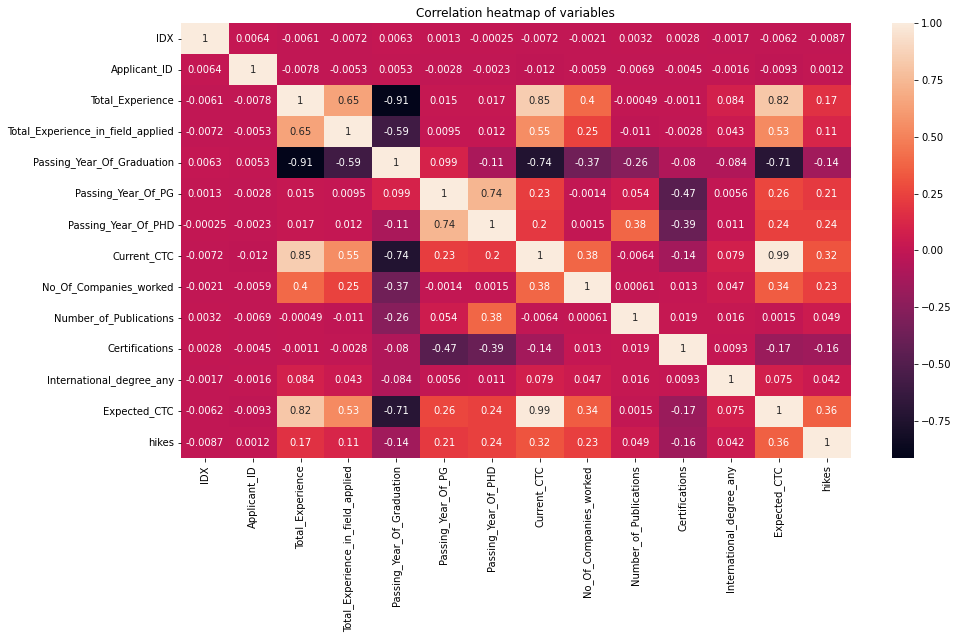

In [72]:
plt.figure(figsize = (15,8))
sns.heatmap(df.corr(), annot = True).set_title('Correlation heatmap of variables');

### Clustering : 

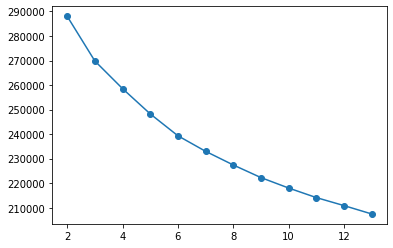

In [73]:
training_data = df[[
        'Total_Experience', 'Total_Experience_in_field_applied', 'Department', 
        'Industry', 'Organization', 'Education', 
        'Graduation_Specialization', 'Passing_Year_Of_Graduation', 
        'PG_Specialization', 'Passing_Year_Of_PG', 'PHD_Specialization',
        'Passing_Year_Of_PHD', 'Curent_Location',
        'Preferred_location', 'Current_CTC', 'Inhand_Offer',
        'Last_Appraisal_Rating', 'No_Of_Companies_worked',
        'Number_of_Publications', 'Certifications', 'International_degree_any',
        'Expected_CTC', 'seniority', 'hikes']]

training_data = training_data[
        (training_data.Graduation_Specialization != -1) &
        (training_data.PG_Specialization != -1) &
        (training_data.PHD_Specialization != -1)
        
    ]

encoder = LabelEncoder()

for feature in training_data.columns : 
    if feature in categorical_features : 
        training_data[feature] = encoder.fit_transform(training_data[feature])

scaler = StandardScaler()
training_data = scaler.fit_transform(training_data)

inertias = []
for i in range(2, 14) : 
    kmeans = KMeans(init = 'k-means++', n_clusters=i, n_init=100, random_state=42).fit(training_data)
    inertias.append(kmeans.inertia_)

plt.figure()
plt.plot([i for i in range(2, 14)], inertias, marker = 'o')
plt.show()

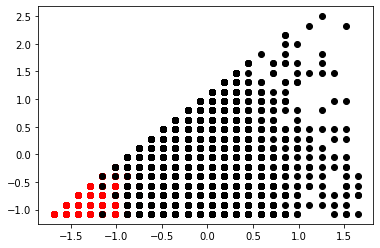

In [74]:
kmeans = KMeans(init = 'k-means++', n_clusters=4, max_iter = 300, n_init=100, random_state=42)

label = kmeans.fit_predict(training_data)

filtered_label2 = training_data[label == 2]
 
filtered_label3 = training_data[label == 3]
 
#Plotting the results
plt.scatter(filtered_label2[:,0] , filtered_label2[:,1] , color = 'red')
plt.scatter(filtered_label3[:,0] , filtered_label3[:,1] , color = 'black')

plt.show()

In [75]:
df.head()

IDX  Applicant_ID  Total_Experience  Total_Experience_in_field_applied  \
0    1         22753                 0                                  0   
1    2         51087                23                                 14   
2    3         38413                21                                 12   
3    4         11501                15                                  8   
4    5         58941                10                                  5   

       Department               Role   Industry Organization      Designation  \
0       Marketing            Analyst         IT            I  Product Manager   
1              HR         Consultant  Analytics            H               HR   
2  Top Management         Consultant   Training            J       Consultant   
3         Banking  Financial Analyst   Aviation            F               HR   
4           Sales    Project Manager  Insurance            E  Medical Officer   

   Education  ... Current_CTC Inhand_Offer  Last_Appraisal_Rating  \
0         PG  ...           0            N                      B   
1  Doctorate  ...     2702664            Y          Key_Performer   
2  Doctorate  ...     2236661            Y          Key_Performer   
3  Doctorate  ...     2100510            N                      C   
4       Grad  ...     1931644            N                      C   

  No_Of_Companies_worked Number_of_Publications  Certifications  \
0                      0                      0               0   
1                      2                      4               0   
2                      5                      3               0   
3                      5                      3               0   
4                      2                      3               0   

  International_degree_any Expected_CTC   seniority hikes  
0                        0       384551     fresher     0  
1                        0      3783729     manager    40  
2                        0      3131325     manager    40  
3                        0      2608833      senior    24  
4                        0      2221390  mid senior    15  

[5 rows x 31 columns]

## Modelling :

In [80]:
df.columns

Index(['IDX', 'Applicant_ID', 'Total_Experience',
       'Total_Experience_in_field_applied', 'Department', 'Role', 'Industry',
       'Organization', 'Designation', 'Education', 'Graduation_Specialization',
       'University_Grad', 'Passing_Year_Of_Graduation', 'PG_Specialization',
       'University_PG', 'Passing_Year_Of_PG', 'PHD_Specialization',
       'University_PHD', 'Passing_Year_Of_PHD', 'Curent_Location',
       'Preferred_location', 'Current_CTC', 'Inhand_Offer',
       'Last_Appraisal_Rating', 'No_Of_Companies_worked',
       'Number_of_Publications', 'Certifications', 'International_degree_any',
       'Expected_CTC', 'seniority', 'hikes', 'hike_class'],
      dtype='object')

We drop the values where the value is -1 because -1 represents missing value here

In [81]:
df = df[df.Graduation_Specialization != -1]
df = df[df.University_Grad != -1]
df = df[df.PG_Specialization != -1]
df = df[df.University_PG != -1]
df = df[df.PHD_Specialization != -1]
df = df[df.University_PHD != -1]

In [82]:
new_shape = df.shape[0]
print('loss of data : {} %'.format((old_shape - new_shape)/old_shape))

loss of data : 0.40548 %


now we encode the categorical features using one hot encoding 

here we don't use one hot encoding as it will increase the dimension rapidly

In [83]:
encoder = LabelEncoder()
df['Department'] = encoder.fit_transform(df['Department']) 
df['Role'] = encoder.fit_transform(df['Role']) 
df['Industry'] = encoder.fit_transform(df['Industry']) 
df['Organization'] = encoder.fit_transform(df['Organization']) 
df['Designation'] = encoder.fit_transform(df['Designation']) 
df['Education'] = encoder.fit_transform(df['Education']) 
df['Graduation_Specialization'] = encoder.fit_transform(df['Graduation_Specialization']) 
df['University_Grad'] = encoder.fit_transform(df['University_Grad']) 
df['Passing_Year_Of_Graduation'] = encoder.fit_transform(df['Passing_Year_Of_Graduation']) 
df['PG_Specialization'] = encoder.fit_transform(df['PG_Specialization']) 
df['University_PG'] = encoder.fit_transform(df['University_PG']) 
df['Passing_Year_Of_PG'] = encoder.fit_transform(df['Passing_Year_Of_PG']) 
df['PHD_Specialization'] = encoder.fit_transform(df['PHD_Specialization']) 
df['University_PHD'] = encoder.fit_transform(df['University_PHD']) 
df['Passing_Year_Of_PHD'] = encoder.fit_transform(df['Passing_Year_Of_PHD']) 
df['Last_Appraisal_Rating'] = encoder.fit_transform(df['Last_Appraisal_Rating']) 
df['seniority'] = encoder.fit_transform(df['seniority']) 
df['Curent_Location'] = encoder.fit_transform(df['Curent_Location']) 
df['Preferred_location'] = encoder.fit_transform(df['Preferred_location']) 
df['Inhand_Offer'] = encoder.fit_transform(df['Inhand_Offer']) 

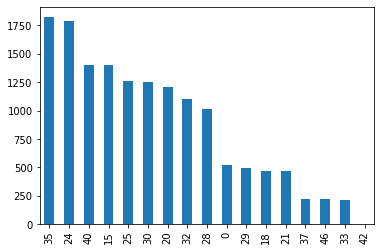

In [84]:
df.hikes.value_counts(sort=True).plot(kind = 'bar');

Now we split the data into dependent and independent feature

In [167]:
X = df.drop(labels = ['IDX', 'Applicant_ID', 'hikes', 'hike_class', 'Expected_CTC'], axis = 1)
y = df['Expected_CTC']

In [168]:
def correlation(dataset, threshold):
    col_corr = set()  
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: 
                colname = corr_matrix.columns[i]    
                col_corr.add(colname)
    return col_corr

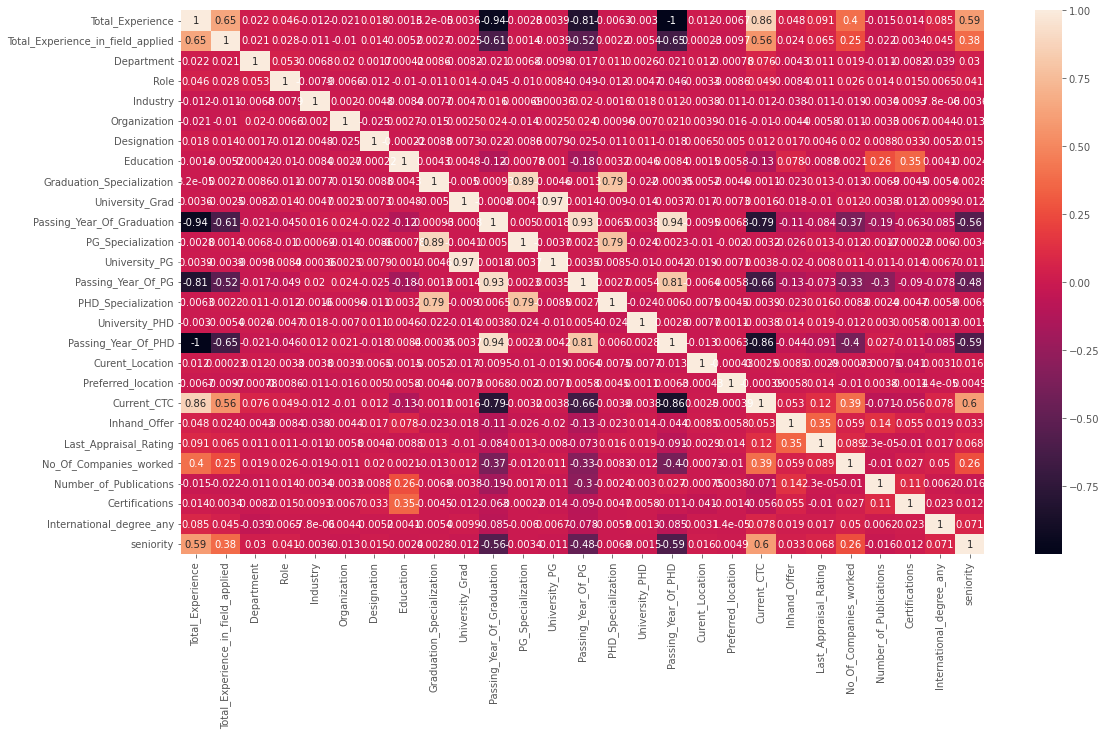

In [169]:
corrmat = X.corr()
fig, ax = plt.subplots()
fig.set_size_inches(18,10)
sns.heatmap(corrmat, annot=True);

We try to find the highly correlated features to later drop them to remove multicollinearity 

In [170]:
corr_features = correlation(X, 0.85)
len(set(corr_features))

6

In [171]:
corr_features

{'Current_CTC',
 'PG_Specialization',
 'Passing_Year_Of_Graduation',
 'Passing_Year_Of_PG',
 'Passing_Year_Of_PHD',
 'University_PG'}

In [172]:
X.drop(corr_features,axis=1, inplace = True)

scaling features before training model

In [173]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(X)

In [174]:
x_train, x_test, y_train, y_test = train_test_split(
    x_scaled, y, test_size = 0.2, random_state = 42
)

In [175]:
def generate_regression_report(model_name, x_train, y_train, x_test, y_test) : 
    model_name.fit(x_train, y_train)
    y_pred = model_name.predict(x_test)
    print(model_name)
    print('='*25)
    MAE = metrics.mean_absolute_error(y_test, y_pred)
    RMSE = np.sqrt(metrics.mean_squared_error(y_test,y_pred))
    r2_score = metrics.r2_score(y_test,y_pred)
    print('Mean absolute error : ', MAE)
    print('Root mean sq error : ', RMSE)
    print('='*25)
    print('R2 score : ', r2_score)
    print('='*25)
    return y_pred, MAE, RMSE, r2_score

n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(x_train)
    rmse= np.sqrt(-cross_val_score(model, x_train, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)


In [176]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

lin_pred, MAE_lin, RMSE_lin, r2_score_li = generate_regression_report(lin_reg, x_train, y_train, x_test, y_test) 

LinearRegression()
Mean absolute error :  458702.13182902505
Root mean sq error :  595352.3755435738
R2 score :  0.7368122765927752


In [177]:
lreg_coefficient = pd.DataFrame()
lreg_coefficient["Columns"] = X.columns
lreg_coefficient['Coefficient Estimate'] = pd.Series(lin_reg.coef_)
lreg_coefficient

Columns  Coefficient Estimate
0                    Total_Experience         886055.489133
1   Total_Experience_in_field_applied           3035.227253
2                          Department          64231.935804
3                                Role           6757.838730
4                            Industry           8100.717789
5                        Organization           9159.640812
6                         Designation         -10638.736402
7                           Education        -177383.974438
8           Graduation_Specialization         -15083.015830
9                     University_Grad           2944.740445
10                 PHD_Specialization          13105.632106
11                     University_PHD           -337.766463
12                    Curent_Location         -14205.453376
13                 Preferred_location           4911.341492
14                       Inhand_Offer          76270.036569
15              Last_Appraisal_Rating          -3935.845105
16             No_Of_Companies_worked          17094.918001
17             Number_of_Publications         -37668.474715
18                     Certifications         -55285.600204
19           International_degree_any           5784.310966
20                          seniority         167281.942552

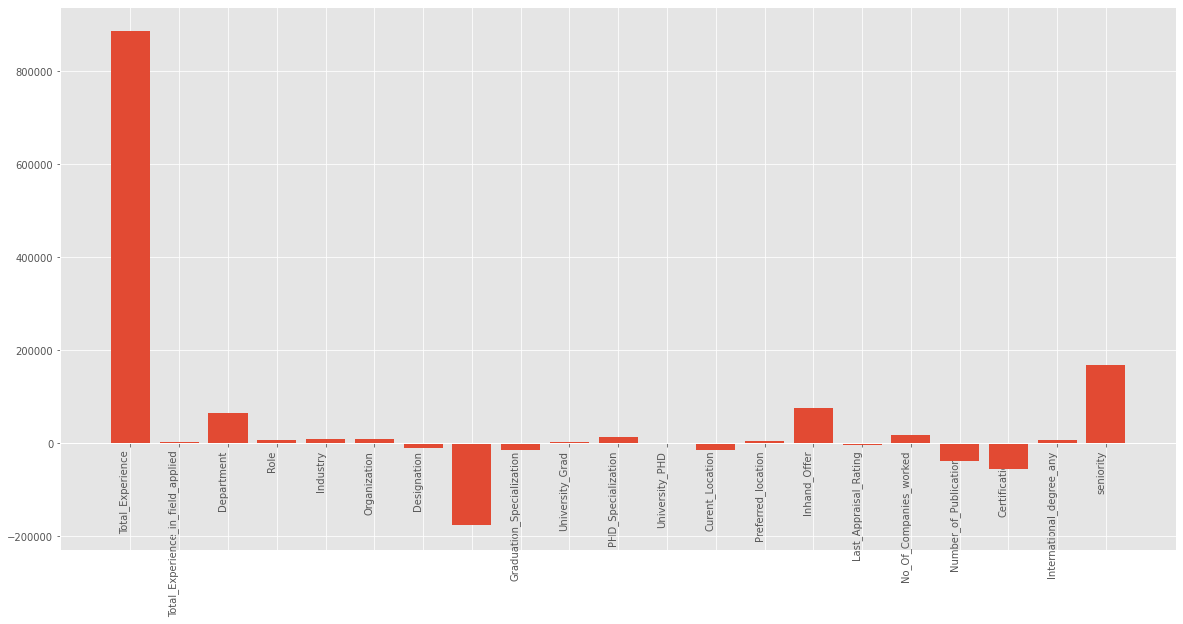

In [178]:
fig, ax = plt.subplots(figsize =(20, 10))
 
ax.bar(lreg_coefficient["Columns"],
lreg_coefficient['Coefficient Estimate'])
 
ax.spines['bottom'].set_position('zero')
 
plt.style.use('ggplot')
plt.xticks(rotation=90, ha='right')
plt.show()

In [179]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha = 1)

ridge_reg_pred, MAE_ridge_reg, RMSE_ridge_reg, r2_score_ridge_reg = generate_regression_report(ridge_reg, x_train, y_train, x_test, y_test) 

Ridge(alpha=1)
Mean absolute error :  458698.5051498449
Root mean sq error :  595348.9814943123
R2 score :  0.7368152774023418


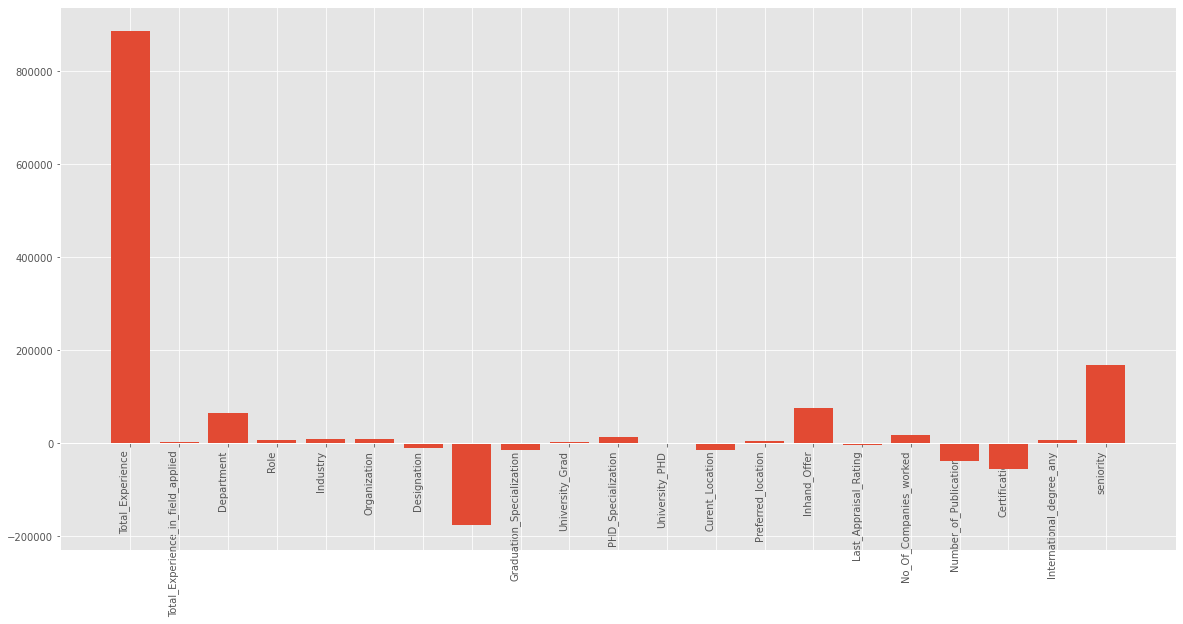

In [180]:
ridge_coefficient = pd.DataFrame()
ridge_coefficient["Columns"] = X.columns
ridge_coefficient['Coefficient Estimate'] = pd.Series(ridge_reg.coef_)

fig, ax = plt.subplots(figsize =(20, 10))
 
ax.bar(ridge_coefficient["Columns"],
ridge_coefficient['Coefficient Estimate'])
 
ax.spines['bottom'].set_position('zero')
 
plt.style.use('ggplot')
plt.xticks(rotation=90, ha='right')
plt.show()

In [181]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha = 1)

lasso_reg_pred, MAE_lasso_reg, RMSE_lasso_reg, r2_score_lasso_reg = generate_regression_report(lasso_reg, x_train, y_train, x_test, y_test) 

Lasso(alpha=1)
Mean absolute error :  458701.7693405744
Root mean sq error :  595352.1283292659
R2 score :  0.7368124951650361


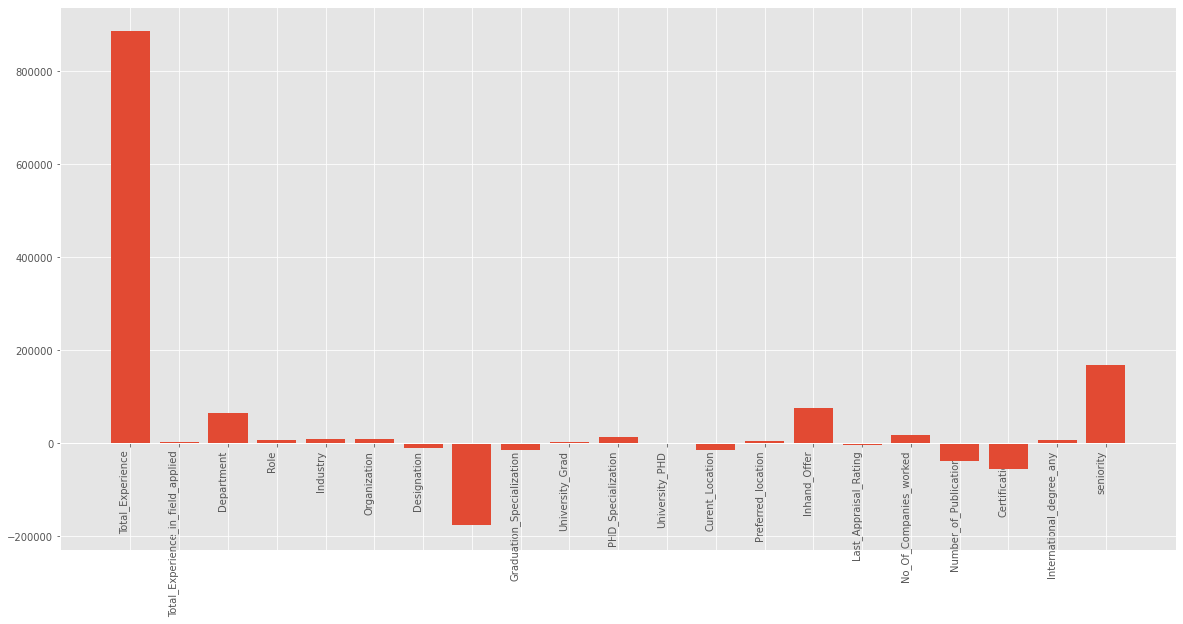

In [182]:
lasso_coefficient = pd.DataFrame()
lasso_coefficient["Columns"] = X.columns
lasso_coefficient['Coefficient Estimate'] = pd.Series(lasso_reg.coef_)

fig, ax = plt.subplots(figsize =(20, 10))
 
ax.bar(lasso_coefficient["Columns"],
lasso_coefficient['Coefficient Estimate'])
 
ax.spines['bottom'].set_position('zero')
 
plt.style.use('ggplot')
plt.xticks(rotation=90, ha='right')
plt.show()

In [183]:
from sklearn.linear_model import ElasticNet
enet_reg = ElasticNet(alpha = 1)

enet_reg_pred, MAE_enet_reg, RMSE_enet_reg, r2_score_enet_reg = generate_regression_report(enet_reg, x_train, y_train, x_test, y_test) 

ElasticNet(alpha=1)
Mean absolute error :  500876.8040577223
Root mean sq error :  650307.492667211
R2 score :  0.6859816976301251


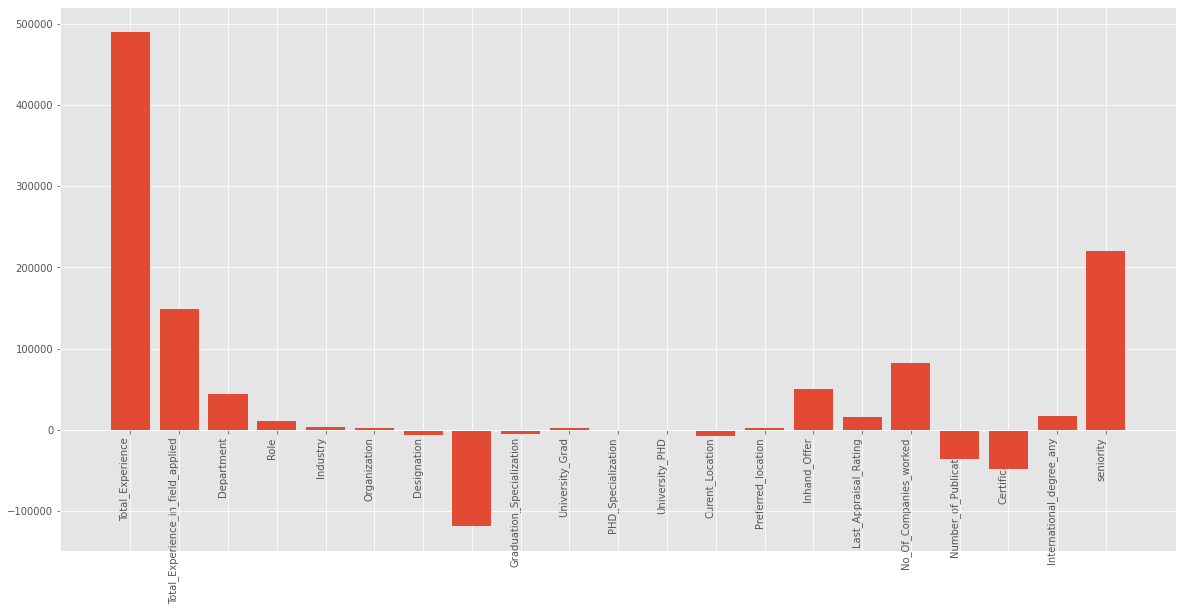

In [184]:
enet_coefficient = pd.DataFrame()
enet_coefficient["Columns"] = X.columns
enet_coefficient['Coefficient Estimate'] = pd.Series(enet_reg.coef_)

fig, ax = plt.subplots(figsize =(20, 10))
 
ax.bar(enet_coefficient["Columns"],
enet_coefficient['Coefficient Estimate'])
 
ax.spines['bottom'].set_position('zero')
 
plt.style.use('ggplot')
plt.xticks(rotation=90, ha='right')
plt.show()

In [185]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()

rf_pred, MAE_rf, RMSE_rf, r2_score_rf = generate_regression_report(reg_rf, x_train, y_train, x_test, y_test) 

RandomForestRegressor()
Mean absolute error :  283005.0254591322
Root mean sq error :  389819.4100510183
R2 score :  0.8871648617197596


In [186]:
from sklearn.tree import DecisionTreeRegressor
reg_dt = DecisionTreeRegressor()

dt_pred, MAE_dt, RMSE_dt, r2_score_dt = generate_regression_report(reg_dt, x_train, y_train, x_test, y_test) 

DecisionTreeRegressor()
Mean absolute error :  378111.884291961
Root mean sq error :  538502.7033157437
R2 score :  0.7846756120967178


random forest gives least error so we select this model 

In [133]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 500, num = 5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 5)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 35, 60, 85, 110, None], 'min_samples_split': [2, 5], 'min_samples_leaf': [2, 4], 'bootstrap': [True, False]}


In [134]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(x_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 35, 60, 85, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [2, 4],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   random_state=42, verbose=2)

In [136]:
rf_random.best_params_

{'n_estimators': 500,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 10,
 'bootstrap': True}

In [187]:
rf_random = RandomForestRegressor(n_estimators = 500, min_samples_split = 5, min_samples_leaf = 4, max_features = 'auto', max_depth = 10, bootstrap = True)
rf_ht_pred, MAE_rf_ht, RMSE_rf_ht, r2_score_rf_ht = generate_regression_report(rf_random, x_train, y_train, x_test, y_test) 

RandomForestRegressor(max_depth=10, min_samples_leaf=4, min_samples_split=5,
                      n_estimators=500)
Mean absolute error :  281563.18601606425
Root mean sq error :  386356.16809301154
R2 score :  0.8891608604190143


In [188]:
rf_random.feature_importances_

array([8.03095175e-01, 2.87344110e-03, 3.31612634e-02, 2.73803544e-03,
       2.16300959e-03, 3.20020566e-03, 2.64549986e-03, 1.02771744e-01,
       1.98182720e-03, 2.83328967e-03, 2.45126648e-03, 2.31362582e-03,
       2.53858285e-03, 2.65618860e-03, 9.20224769e-04, 2.28813205e-02,
       2.10412868e-03, 2.03753044e-03, 2.63138531e-04, 1.91693586e-04,
       4.17880865e-03])

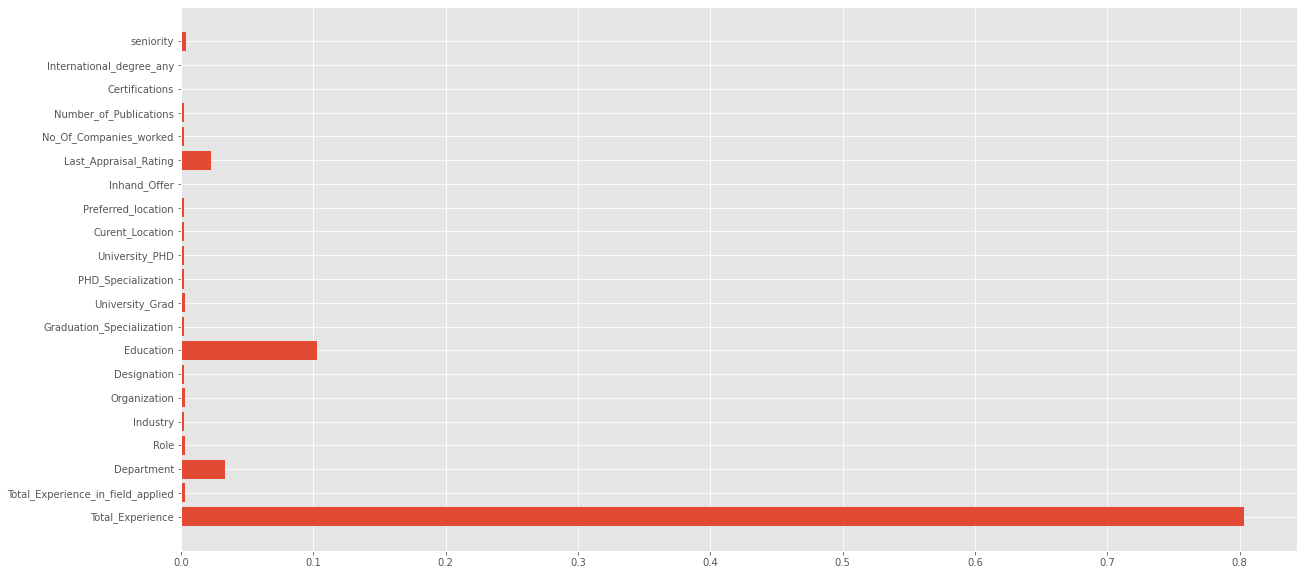

In [189]:
fig, ax = plt.subplots(figsize =(20, 10))
plt.barh(X.columns, rf_random.feature_importances_);

In [190]:
# result 
 
data = {
    'model' : ['linear reg', 'ridge', 'lasso', 'enet', 'random forest', 'decision tree', 'rf best'], 
    'MAE' : [MAE_lin, MAE_ridge_reg, MAE_lasso_reg, MAE_enet_reg, MAE_rf, MAE_dt, MAE_rf_ht], 
    'RMSE' : [RMSE_lin, RMSE_ridge_reg, RMSE_lasso_reg, RMSE_enet_reg, RMSE_rf, RMSE_dt, RMSE_rf_ht], 
    'r2_score' : [r2_score_li, r2_score_ridge_reg, r2_score_lasso_reg, r2_score_enet_reg, r2_score_rf, r2_score_dt, r2_score_rf_ht]
}

result_df = pd.DataFrame(data)
result_df

model            MAE           RMSE  r2_score
0     linear reg  458702.131829  595352.375544  0.736812
1          ridge  458698.505150  595348.981494  0.736815
2          lasso  458701.769341  595352.128329  0.736812
3           enet  500876.804058  650307.492667  0.685982
4  random forest  283005.025459  389819.410051  0.887165
5  decision tree  378111.884292  538502.703316  0.784676
6        rf best  281563.186016  386356.168093  0.889161

## testing on real example :

In [191]:
# lets consider a person with the following parameters 
person_data =  {'Total_Experience' : 5, 
'Total_Experience_in_field_applied' : 3, 
'Department' : 3, 
'Role' : 3, 
'Industry' : 1, 
'Organization' : 2, 
'Designation' : 2, 
'Education' : 1, 
'Graduation_Specialization' : 2, 
'University_Grad' : 3, 
'PHD_Specialization' : 0, 
'University_PHD' : 2, 
'Curent_Location' : 2, 
'Preferred_location' : 3,
'Inhand_Offer' : 5, 
'Last_Appraisal_Rating' : 5, 
'No_Of_Companies_worked' : 3, 
'Number_of_Publications' : 2, 
'Certifications' : 2, 
'International_degree_any' : 0, 
'seniority' : 2}

print(person_data)

{'Total_Experience': 5, 'Total_Experience_in_field_applied': 3, 'Department': 3, 'Role': 3, 'Industry': 1, 'Organization': 2, 'Designation': 2, 'Education': 1, 'Graduation_Specialization': 2, 'University_Grad': 3, 'PHD_Specialization': 0, 'University_PHD': 2, 'Curent_Location': 2, 'Preferred_location': 3, 'Inhand_Offer': 5, 'Last_Appraisal_Rating': 5, 'No_Of_Companies_worked': 3, 'Number_of_Publications': 2, 'Certifications': 2, 'International_degree_any': 0, 'seniority': 2}


In [192]:
print('predicted salary for the person is ', round(rf_random.predict([list(person_data.values())])[0]))

predicted salary for the person is  4487647
